In [1]:
import ROOT
import os
from my_utils import *




Welcome to JupyROOT 6.14/04


In [2]:
def take_data(**kwargs):
    events  = int(kwargs.get("events",0))
    time = float(kwargs.get("time",0))
    
    
    os.system("rm /workdir/*.root")
    os.system("cd /workdir; tree_out=true go4analysis -number {:d} -stream localhost:6790".format(int(events)))
    os.system("cd /workdir; root -b -l unify.C -q")
    


In [3]:
take_data(events=1000)

GO4-*> Reading library: libGo4UserAnalysis  
GO4-*> Close of TUserSource  
GO4-*> Create default analysis with processor class TFirstStepProcessor  
GO4-*> Use class TStreamEvent as output event  
GO4-*> Welcome to Go4 Analysis Framework Release v5.9.0 (build 50900) !  
GO4-*> Analysis: Added analysis step Analysis  
GO4-*> Main: starting analysis in batch mode ...    
GO4-!> Fail to open AutoSave file Go4AutoSave.root  
GO4-*> Analysis LoadObjects: Failed to load from file Go4AutoSave.root  
Use MBS source port 6790
f_evt_get_open for STREAM: port=6790 timeout=1  
GO4-*> Factory: Create input event for MBS  
GO4-*> Event MbsEvent101 has source localhost:6790 class: TGo4MbsStream  
GO4-*> Factory: Create event processor Processor  
GO4-*> Create TFirstStepProcessor Processor  
GO4-*> Executing ROOT script first.C  
HLD configure calibration calfile:test_  cnt:0 trig:0 temp:0
GO4-*> Executing ROOT script second.C+  
Create Sec_0350 for TDC_0350
GO4-*> Factory: Create output event Output

Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Hit is available


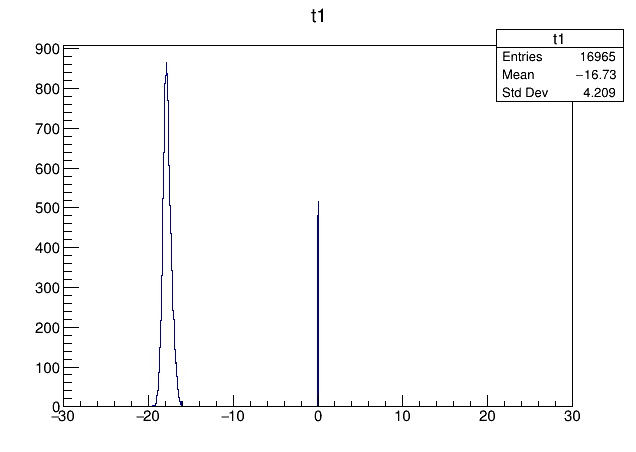

In [4]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

f = ROOT.TFile("/workdir/joint_tree.root")
tree = f.Get("joint_tree")
tree.Draw("t1>>t1(1000,-30,30)","","")
#tree.Draw("tot_a:t1_a >> potato(500,0,500e-9,500,0,500e-9)","","colz")

#potato = f.Get("potato")
#potato.SetTitle("potato")
#potato.GetXaxis().SetTitle("t1 (s)")
#potato.GetYaxis().SetTitle("tot (s)")
#potato.Draw("colz")
c.Draw()

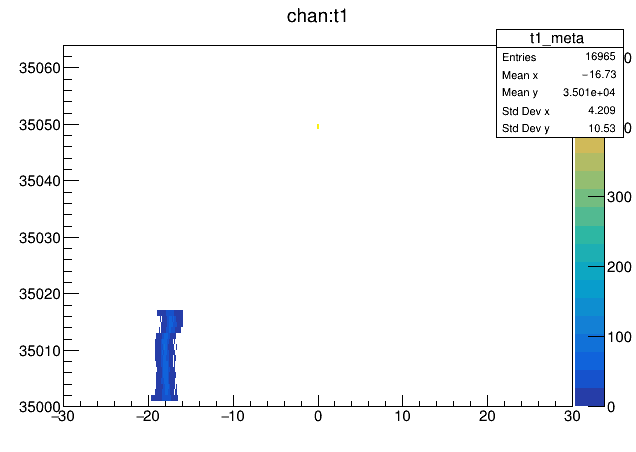

In [14]:
tdc=350
disp_channels = 64
tree.Draw("chan:t1>>t1_meta(1000,-30,30,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

    new TCanvas();
    joint_tree->Draw(Form("hits.chan - %d: hits.t1>>0x%04d_t1_meta(1000,-1000,1000,%d,%d,%d)",tdc_number*100,tdc_number,tdc_channels[i],1,1+tdc_channels[i]),
            Form("hits.chan > %d && hits.chan < %d",tdc_number*100,tdc_number*100+100),"colz");
    new TCanvas();
    joint_tree->Draw(Form("hits.chan - %d: hits.tot>>0x%04d_tot_meta(1000,0,2000,%d,%d,%d)",tdc_number*100,tdc_number,tdc_channels[i],1,1+tdc_channels[i]),
            Form("hits.chan > %d && hits.chan < %d",tdc_number*100,tdc_number*100+100),"colz");
    new TCanvas();
    joint_tree->Draw(Form("hits.tot : hits.t1 >>0x%04d_potato(1000,-500,500,1000,0,1000)",tdc_number),
            Form("hits.chan > %d && hits.chan < %d",tdc_number*100,tdc_number*100+100),"colz");
